<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_6_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from copy import copy, deepcopy

import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

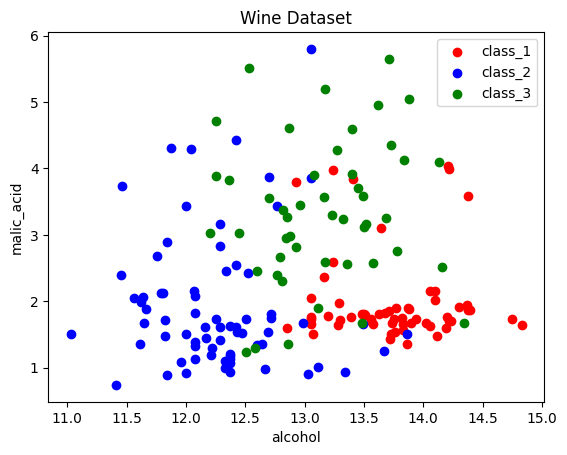

In [32]:
# Load the Iris dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

class_names = ['class_1', 'class_2', 'class_3']

# Assign colors based on labels
colors = ['red', 'blue', 'green']
color_labels = [colors[int(label)] for label in wine.target]

# Plotting the data
for i in range(len(class_names)):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], label=class_names[i])

plt.xlabel(wine['feature_names'][0])
plt.ylabel(wine['feature_names'][1])
plt.title('Wine Dataset')
plt.legend()
plt.show()

In [22]:
df = pd.DataFrame(X)
df.columns = wine['feature_names']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [33]:
# Benchmark the clusters

def benchmark(X, y):
  # assuming ground truth is not available

  scores = {
      'ch': metrics.calinski_harabasz_score(X,y),
      'db': metrics.davies_bouldin_score(X,y),
      'sil': metrics.silhouette_score(X,y),
  }

  return scores

In [34]:
scores_unmodified = benchmark(X, y)

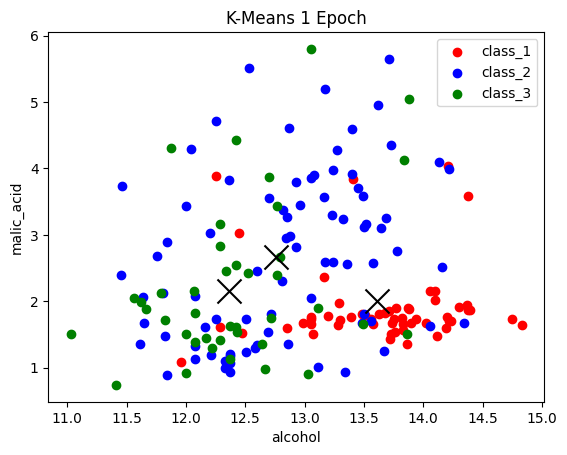

In [36]:
# K-Means clustering for 1 epoch
kmeans_1 = KMeans(n_clusters=3, init='random', random_state=0, n_init=1, max_iter=1)
kmeans_1.fit(X)

# Plotting K-Means clusters
for i in range(len(class_names)):
    plt.scatter(X[kmeans_1.labels_ == i, 0], X[kmeans_1.labels_ == i, 1], c=colors[i], label=class_names[i])

plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s=300, c='black', marker='x')

plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-Means 1 Epoch')
plt.legend()
plt.show()

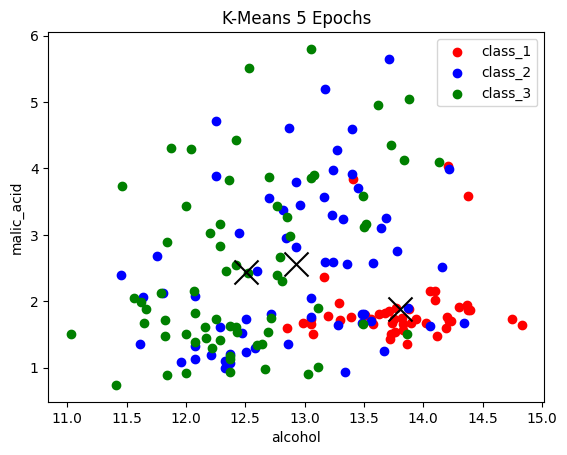

In [38]:
# K-Means clustering for 5 epochs
kmeans_5 = KMeans(n_clusters=3, init='random', random_state=0, n_init=1, max_iter=5)
kmeans_5.fit(X)

# Plotting K-Means clusters
for i in range(len(class_names)):
    plt.scatter(X[kmeans_5.labels_ == i, 0], X[kmeans_5.labels_ == i, 1], c=colors[i], label=class_names[i])

plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], s=300, c='black', marker='x')

plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-Means 5 Epochs')
plt.legend()
plt.show()

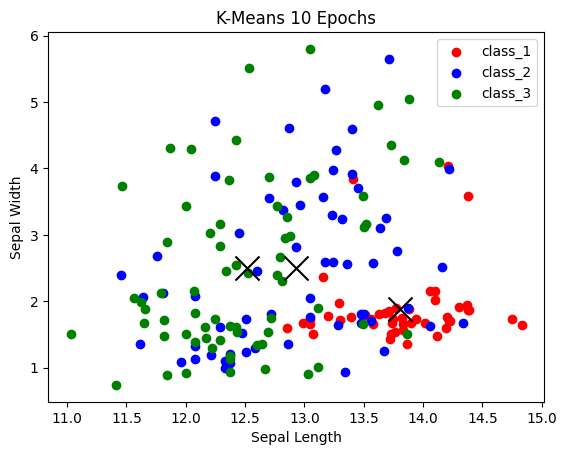

In [39]:
# K-Means clustering for 10 epochs
kmeans_10 = KMeans(n_clusters=3, init='random', random_state=0, n_init=1, max_iter=10)
kmeans_10.fit(X)

# Plotting K-Means clusters
for i in range(len(class_names)):
    plt.scatter(X[kmeans_10.labels_ == i, 0], X[kmeans_10.labels_ == i, 1], c=colors[i], label=class_names[i])

plt.scatter(kmeans_10.cluster_centers_[:, 0], kmeans_10.cluster_centers_[:, 1], s=300, c='black', marker='x')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means 10 Epochs')
plt.legend()
plt.show()

In [46]:
scores_kmeans_1epoch = benchmark(X, kmeans_1.labels_)
scores_kmeans_5epoch = benchmark(X, kmeans_5.labels_)
scores_kmeans_10epoch = benchmark(X, kmeans_10.labels_)

print("CH \t DB \t Sil")
print("{:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_1epoch['ch'], scores_kmeans_1epoch['db'], scores_kmeans_1epoch['sil']))
print("{:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_5epoch['ch'], scores_kmeans_5epoch['db'], scores_kmeans_5epoch['sil']))
print("{:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_10epoch['ch'], scores_kmeans_10epoch['db'], scores_kmeans_10epoch['sil']))

CH 	 DB 	 Sil
421 	 0.540 	 0.497
562 	 0.534 	 0.572
562 	 0.534 	 0.571


In [49]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

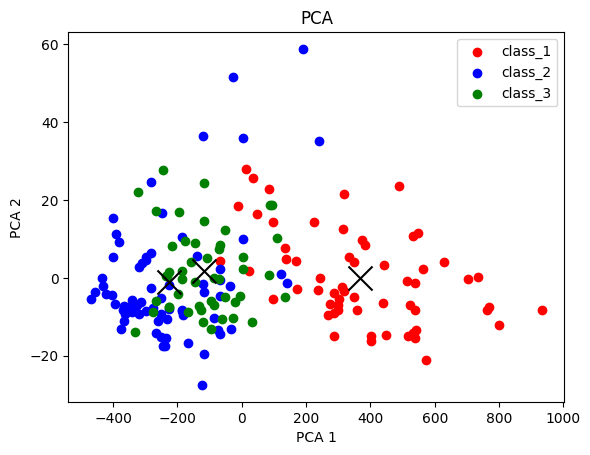

In [50]:
# Plotting K-Means clusters
pca_cluster_centers = np.zeros((3,2))
for i in range(len(class_names)):
    pca_cluster_centers[i,0] = np.mean(X_pca[y == i, 0])
    pca_cluster_centers[i,1] = np.mean(X_pca[y == i, 1])
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=colors[i], label=class_names[i])

plt.scatter(pca_cluster_centers[:, 0], pca_cluster_centers[:, 1], s=300, c='black', marker='x')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA')
plt.legend()
plt.show()

In [51]:
scores_kmeans_pca = benchmark(X_pca, y)

print("\t \t \t CH \t DB \t Sil")
print("Original labels \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_unmodified['ch'], scores_unmodified['db'], scores_unmodified['sil']))
print("KMeans 1 epoch \t \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_1epoch['ch'], scores_kmeans_1epoch['db'], scores_kmeans_1epoch['sil']))
print("KMeans 5 epochs \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_5epoch['ch'], scores_kmeans_5epoch['db'], scores_kmeans_5epoch['sil']))
print("KMeans 10 epochs \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_10epoch['ch'], scores_kmeans_10epoch['db'], scores_kmeans_10epoch['sil']))
print("KMeans PCA \t \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_pca['ch'], scores_kmeans_pca['db'], scores_kmeans_pca['sil']))

	 	 	 CH 	 DB 	 Sil
Original labels 	 207 	 1.515 	 0.200
KMeans 1 epoch 	 	 421 	 0.540 	 0.497
KMeans 5 epochs 	 562 	 0.534 	 0.572
KMeans 10 epochs 	 562 	 0.534 	 0.571
KMeans PCA 	 	 207 	 1.515 	 0.200


In [52]:
# Perform TSNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

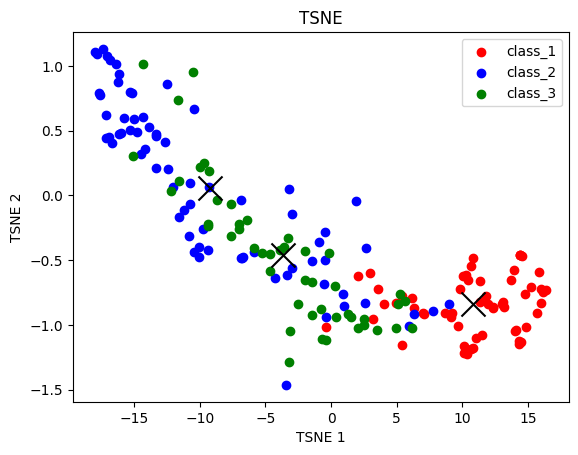

In [53]:
# Plotting TSNE clusters
tsne_cluster_centers = np.zeros((3,2))
for i in range(len(class_names)):
    tsne_cluster_centers[i,0] = np.mean(X_tsne[y == i, 0])
    tsne_cluster_centers[i,1] = np.mean(X_tsne[y == i, 1])
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=class_names[i])

plt.scatter(tsne_cluster_centers[:, 0], tsne_cluster_centers[:, 1], s=300, c='black', marker='x')

plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE')
plt.legend()
plt.show()

In [54]:
scores_kmeans_tsne = benchmark(X_tsne, y)

print("\t \t \t CH \t DB \t Sil")
print("Original labels \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_unmodified['ch'], scores_unmodified['db'], scores_unmodified['sil']))
print("KMeans 1 epoch \t \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_1epoch['ch'], scores_kmeans_1epoch['db'], scores_kmeans_1epoch['sil']))
print("KMeans 5 epochs \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_5epoch['ch'], scores_kmeans_5epoch['db'], scores_kmeans_5epoch['sil']))
print("KMeans 10 epochs \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_10epoch['ch'], scores_kmeans_10epoch['db'], scores_kmeans_10epoch['sil']))
print("PCA \t \t \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_tsne['ch'], scores_kmeans_tsne['db'], scores_kmeans_tsne['sil']))
print("TSNE \t \t \t {:.0f} \t {:.3f} \t {:.3f}".format(scores_kmeans_tsne['ch'], scores_kmeans_tsne['db'], scores_kmeans_tsne['sil']))

	 	 	 CH 	 DB 	 Sil
Original labels 	 207 	 1.515 	 0.200
KMeans 1 epoch 	 	 421 	 0.540 	 0.497
KMeans 5 epochs 	 562 	 0.534 	 0.572
KMeans 10 epochs 	 562 	 0.534 	 0.571
PCA 	 	 	 187 	 1.486 	 0.258
TSNE 	 	 	 187 	 1.486 	 0.258


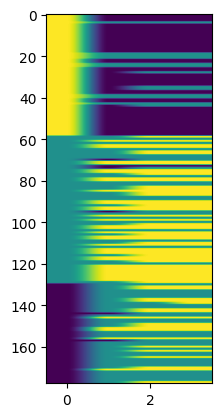

In [56]:
# Compare labels
y_ = copy(y)
y_[y==0] = 2
y_[y==2] = 0

labels = np.zeros((178,4))
labels[:,0] = y_
labels[:,1] = kmeans_1.labels_
labels[:,2] = kmeans_5.labels_
labels[:,3] = kmeans_10.labels_

plt.imshow(labels, aspect=0.05)

In [57]:
# Evaluate clusters through classifier predictions
index_range = list(range(178))
index_train = np.array(random.sample(index_range, 120))
index_test = np.array([i for i in index_range if i not in index_train])
print(index_train)

[121 142  42  29  96 101  21   8   5  56  84  54  69 126  50 115  47  19
  10 171 112 103   7 127 148  99  87   3 123 124 147  58 144 145  52 164
  97 168 117 162  27  55 159  89  62 116 104 165  71  37  65  80 141  45
  22 125 119  93  40  32 139  66  39  92  16  13  33 161 108 114  20  79
 149  49  51  44  64  82 146  63  74 166  15  30 134 158 140 154 110 143
   1  26 172  61  24  70 102 118   6  23 132  81  59 153  72 131 109 156
 167  73 157  18   2 128 163 100 177  34 174 150]


In [58]:
print(index_test)

[  0   4   9  11  12  14  17  25  28  31  35  36  38  41  43  46  48  53
  57  60  67  68  75  76  77  78  83  85  86  88  90  91  94  95  98 105
 106 107 111 113 120 122 129 130 133 135 136 137 138 151 152 155 160 169
 170 173 175 176]


In [59]:
clf_base = DecisionTreeClassifier(random_state=0)

clf_original = deepcopy(clf_base)
clf_kmeans_1 = deepcopy(clf_base)
clf_kmeans_5 = deepcopy(clf_base)
clf_kmeans_10 = deepcopy(clf_base)
clf_pca = deepcopy(clf_base)
clf_tsne = deepcopy(clf_base)

In [60]:
# Train the classifier on the training data
clf_original.fit(X[index_train,:], y_[index_train])
clf_kmeans_1.fit(X[index_train,:], kmeans_1.labels_[index_train])
clf_kmeans_5.fit(X[index_train,:], kmeans_5.labels_[index_train])
clf_kmeans_10.fit(X[index_train,:], kmeans_10.labels_[index_train])
clf_pca.fit(X_pca[index_train,:], y_[index_train])
clf_tsne.fit(X_tsne[index_train,:], y_[index_train])

DecisionTreeClassifier(random_state=0)

In [61]:
# Make predictions on the testing data
y_pred_original = clf_original.predict(X[index_test,:])
y_pred_kmeans_1 = clf_kmeans_1.predict(X[index_test,:])
y_pred_kmeans_5 = clf_kmeans_5.predict(X[index_test,:])
y_pred_kmeans_10 = clf_kmeans_10.predict(X[index_test,:])
y_pred_pca = clf_pca.predict(X_pca[index_test,:])
y_pred_tsne = clf_pca.predict(X_tsne[index_test,:])

In [62]:
# Calculate the accuracy of the classifier
acc_original = accuracy_score(y_[index_test], y_pred_original)
acc_kmeans_1 = accuracy_score(y_[index_test], y_pred_kmeans_1)
acc_kmeans_5 = accuracy_score(y_[index_test], y_pred_kmeans_5)
acc_kmeans_10 = accuracy_score(y_[index_test], y_pred_kmeans_10)
acc_pca = accuracy_score(y_[index_test], y_pred_pca)
acc_tsne = accuracy_score(y_[index_test], y_pred_tsne)

In [63]:
print("Acc original {:.3f}".format(acc_original))
print("Acc KMeans 1 epoch {:.3f}".format(acc_kmeans_1))
print("Acc KMeans 5 epochs {:.3f}".format(acc_kmeans_5))
print("Acc KMeans 10 epochs {:.3f}".format(acc_kmeans_10))
print("Acc PCA {:.3f}".format(acc_pca))
print("Acc TSNE {:.3f}".format(acc_tsne))

Acc original 0.914
Acc KMeans 1 epoch 0.224
Acc KMeans 5 epochs 0.103
Acc KMeans 10 epochs 0.103
Acc PCA 0.707
Acc TSNE 0.190
